<a href="https://colab.research.google.com/github/MELAI-1/MY-PROJECT/blob/main/Finances/Credit_Card_Fraud_Detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Fraud Detection - ML

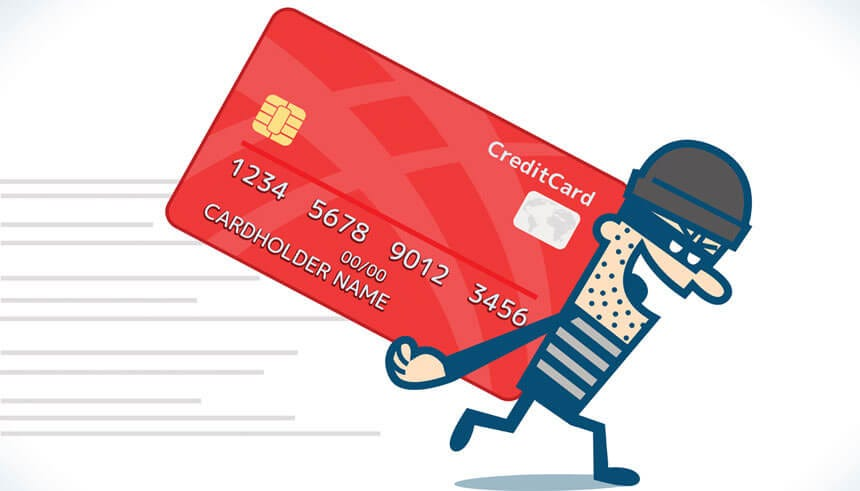

The goal of this project is to develop a machine learning model that can accurately detect fraudulent credit card transactions using historical data. By analyzing transaction patterns, the model should be able to distinguish between normal and fraudulent activity, helping financial institutions flag suspicious behavior early and reduce potential risks.

[link dataset](https://media.geeksforgeeks.org/wp-content/uploads/20240904104950/creditcard.csv)

Challenges include:

  * Handling imbalanced datasets where fraud cases are a small fraction of total transactions.
  * Ensuring high precision to minimize false positives (flagging a valid transaction as fraud).
  * Ensuring high recall to detect as many fraud cases as possible.

# **Step 1: Importing necessary Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix

# **Step 2: Loading the Data**

In [ ]:
data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


The dataset contains 59510 transactions with 31 features including:

  * **Time:** This shows how many seconds have passed since the first transaction in the dataset.
  * **V1-V28:** These are special features created to hide sensitive information about the original data.
  * **Amount:** Transaction amount.
  * **Class:** Target variable (0 for normal transactions, 1 for fraudulent transactions).

Now, let's explore if we have nan value in the dataset

In [ ]:
nan_values = data.isnull().sum()
print(nan_values)

data.dropna(inplace=True)



Now, let's explore more about the dataset using df.describe() method

In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,59510.000000,59510.000000,59510.000000,59510.000000,59510.000000,59510.000000,59510.000000,59510.000000,59510.000000,59510.000000,...,59510.000000,59510.000000,59510.000000,59510.000000,59510.000000,59510.000000,59510.000000,59510.000000,59510.000000,59510.000000
mean,31748.016669,-0.238786,-0.010206,0.688634,0.171367,-0.259829,0.102750,-0.114718,0.055167,0.063542,...,-0.027845,-0.107505,-0.039753,0.006762,0.136147,0.020146,0.002969,0.004292,95.417957,0.002722
std,13666.538897,1.866654,1.658371,1.446493,1.386079,1.394128,1.308052,1.251972,1.191471,1.183017,...,0.723975,0.637525,0.594265,0.596854,0.438683,0.498979,0.384503,0.325266,270.114653,0.052104
min,0.000000,-56.407510,-72.715728,-32.965346,-5.172595,-42.147898,-26.160506,-26.548144,-41.484823,-9.283925,...,-20.262054,-10.933144,-26.751119,-2.836627,-7.495741,-2.534330,-8.567638,-9.617915,0.000000,0.000000
25%,26156.500000,-0.993830,-0.581508,0.204127,-0.726741,-0.877852,-0.636653,-0.604522,-0.145133,-0.648072,...,-0.228746,-0.527697,-0.179894,-0.325270,-0.128046,-0.330056,-0.063393,-0.006316,7.680000,0.000000
50%,35617.000000,-0.245300,0.075679,0.779306,0.184182,-0.293987,-0.151765,-0.074182,0.061635,-0.039897,...,-0.063847,-0.082948,-0.051941,0.061830,0.174226,-0.075484,0.008921,0.022539,25.950000,0.000000
75%,42028.000000,1.155005,0.731503,1.413516,1.053209,0.278908,0.492733,0.424402,0.337119,0.735223,...,0.112591,0.307969,0.078831,0.403203,0.422293,0.297880,0.082628,0.076307,87.540000,0.000000
max,48870.000000,1.960497,18.183626,4.101716,16.715537,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,5.805795,17.297845,4.014444,5.525093,3.517346,11.135740,33.847808,19656.530000,1.000000


# **Step 3: Analyzing Class Distribution**

In [ ]:
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print('outlier percentage: {} %'.format(outlierFraction*100))
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

outlier percentage: 0.2729662330659837 %
Fraud Cases: 162
Valid Transactions: 59348


# **Step 4: Exploring Transaction Amounts**

In [ ]:
print("Amount details of the fraudulent transaction")
fraud.Amount.describe()

Amount details of the fraudulent transaction


,Amount
count,162.000000
mean,93.565988
std,224.658775
min,0.000000
25%,1.000000
50%,4.245000
75%,99.990000
max,1809.680000


In [ ]:
print("details of valid transaction")
valid.Amount.describe()

details of valid transaction


,Amount
count,59348.000000
mean,95.423013
std,270.229826
min,0.000000
25%,7.690000
50%,25.985000
75%,87.440000
max,19656.530000


From the output we observe that fraudulent transactions tend to have higher average amounts which is important in fraud detection.

# **Step 5: Plotting Correlation Matrix**

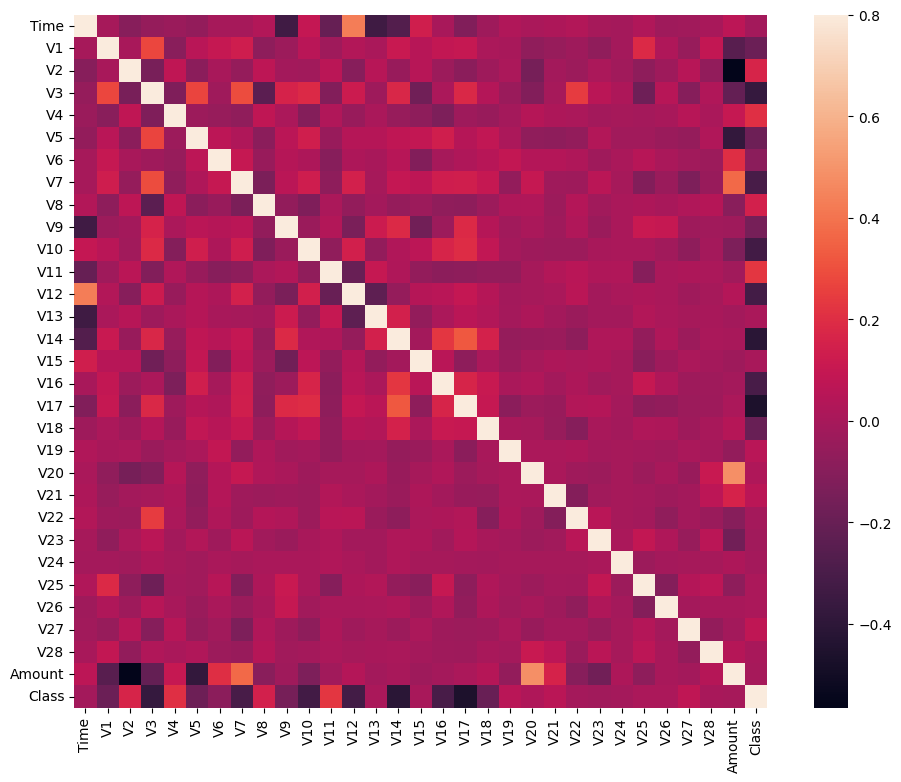

In [ ]:
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

Most features do not correlate strongly with others but some features like V2 and V5 have a negative correlation with the Amount feature. This provides valuable insights into how the features are related to the transaction amounts.

# **Step 6: Preparing Data**

In [ ]:
X = data.drop(['Class'], axis = 1)
Y = data["Class"]
print(X.shape)
print(Y.shape)

xData = X.values
yData = Y.values

xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, test_size = 0.2, random_state = 42)

(59510, 30)
(59510,)


# **Step 7: Building and Training the Model**

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)

yPred = rfc.predict(xTest)

# **Step 8: Evaluating the Model**

Model Evaluation Metrics:
Accuracy: 0.9995
Precision: 1.0000
Recall: 0.7857
F1-Score: 0.8800
Matthews Correlation Coefficient: 0.8862


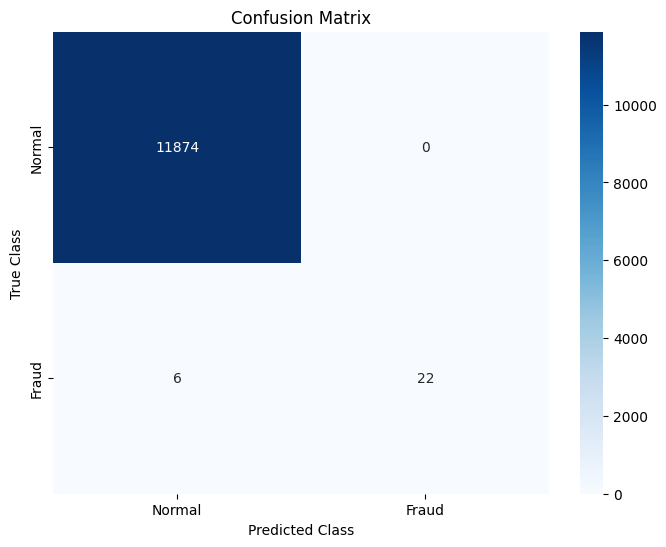

In [ ]:
accuracy = accuracy_score(yTest, yPred)
precision = precision_score(yTest, yPred)
recall = recall_score(yTest, yPred)
f1 = f1_score(yTest, yPred)
mcc = matthews_corrcoef(yTest, yPred)

print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Matthews Correlation Coefficient: {mcc:.4f}")

conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

**Model Evaluation Metrics:**

The model accuracy is high due to class imbalance so we will have computed precision, recall and f1 score to get a more meaningful understanding. We observe:

  * **Accuracy: 0.9995**: Out of all predictions, 99.95% were correct. However, in imbalanced datasets (like fraud detection), accuracy can be misleading i.e. a model that predicts everything as "not fraud" will still have high accuracy.
  * **Precision: 1: ** When the model predicted "fraud", it was correct 98.73% of the time. High precision means very few false alarms (false positives).
  * **Recall: 0.7857:** Out of all actual fraud cases, the model detected 78.57%. This shows how well it catches real frauds. A lower recall means some frauds were missed (false negatives).
  * **F1-Score: 0.88:**  A balance between precision and recall. 88 % is strong and shows the model handles both catching fraud and avoiding false alarms well.
  * **Matthews Correlation Coefficient (MCC):** 0.8862: A more balanced score (from -1 to +1) even when classes are imbalanced. A value of 0.8862 is very good, it means the model is making strong, balanced predictions overall.

We can balance dataset by oversampling the minority class or by undersampling the majority class we can increase accuracy of our model.